In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

sc.settings.verbosity = 1
sns.set(font_scale=1)
sc.settings.set_figure_params(dpi=150)
sns.set_style("ticks")

In [31]:
df = pd.DataFrame({
    "sc333_e11": [356354.54962, 323699.87601, "All"],
    "sc348_e13": [989461.94657, 1082500.1489, "All"],
    "sc333_e14": [272007.69489, 272072.03796, "All"],
    "sc347_e11": [40608.17841, 1308444.28761, "TG"],
    "sc347_e13": [24821.4522, 1107431.33617, "TG"],
    "sc347_e15": [20964.88273, 1041692.81071, "TG"],
    "sc347_e17": [21754.6636, 681610.1677, "TG"],
}, index=["jaw", "tg", "pattern"]).T

df["tg_to_jaw"] = df.tg / df.jaw

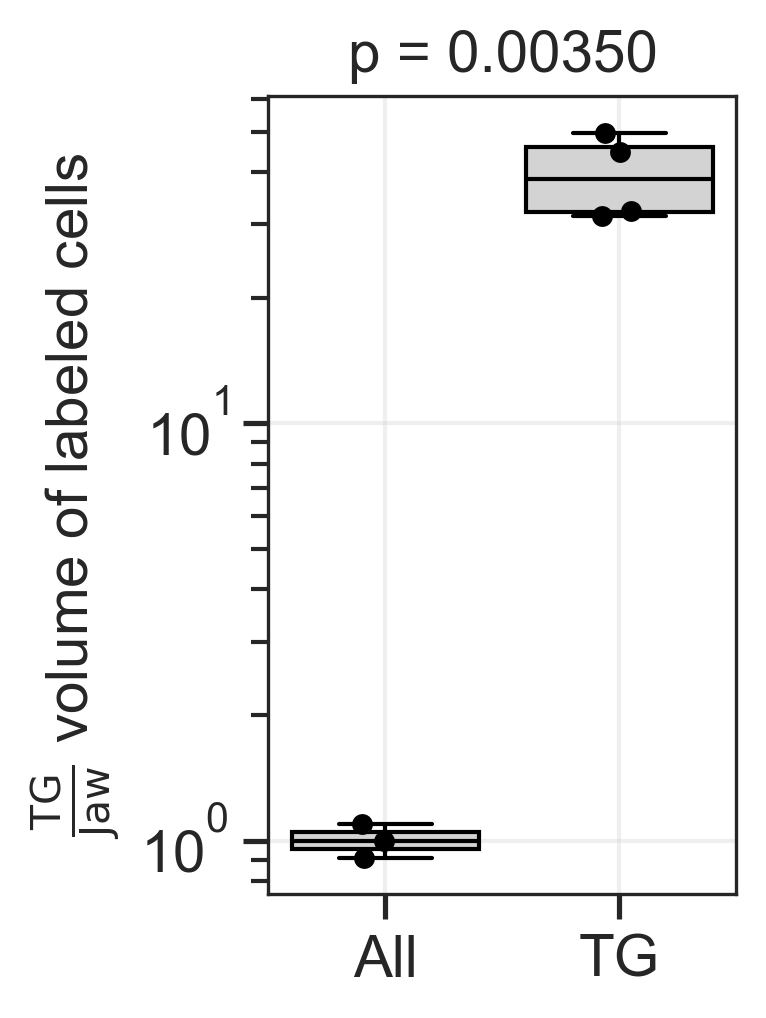

In [53]:
boxplot_props = {
    "boxprops": {"facecolor": "lightgray", "edgecolor": "black"},
    "medianprops": {"color": "black"},
    "whiskerprops": {"color": "black"},
    "capprops": {"color": "black"}
}

fig, ax = plt.subplots(figsize=(2, 3.5))

sns.boxplot(
    x="pattern",
    y="tg_to_jaw",
    ax=ax,
    data=df,
    **boxplot_props,
)

sns.stripplot(
    x="pattern",
    y="tg_to_jaw",
    ax=ax,
    data=df,
    color="black",
)

ax.set_yscale("log")
ax.grid(alpha=0.3)

ax.set_xlabel("")
ax.set_ylabel(r"$\frac{\mathrm{TG}}{\mathrm{Jaw}}$ volume of labeled cells")

p = ttest_ind(
    list(df[df.pattern == "All"].tg_to_jaw),
    list(df[df.pattern == "TG"].tg_to_jaw),
    equal_var=False,
).pvalue

ax.set_title(f"p = {p:.5f}")

plt.savefig("figures/alek_data.pdf", bbox_inches="tight")